# Rainfall Prediction - Weather Forecasting
### Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
### 1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


### Dataset Description:

- Date  - The date of observation
- Location  -The common name of the location of the weather station
- MinTemp  -The minimum temperature in degrees celsius
- MaxTemp -The maximum temperature in degrees celsius
- Rainfall  -The amount of rainfall recorded for the day in mm
- Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine  -The number of hours of bright sunshine in the day.
- WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am -Direction of the wind at 9am
- WindDir3pm -Direction of the wind at 3pm
- WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
- WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9am -Humidity (percent) at 9am
- Humidity3pm -Humidity (percent) at 3pm
- Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- Cloud9am - Fraction of sky obscured by cloud at 9am. 
- Cloud3pm -Fraction of sky obscured by cloud 
- Temp9am-Temperature (degrees C) at 9am
- Temp3pm -Temperature (degrees C) at 3pm
- RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams  # for plotting box plot, to check outliers
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # for scaling

In [2]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [3]:
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Reading data frame and understanding data

In [4]:
df = pd.read_csv('weatherAUS.csv')

In [5]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [6]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[5 rows x 23 columns]

In [7]:
df.sample(10)

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2731  2015-06-15       Penrith      7.8     17.4       0.0          NaN   
5805  2011-01-22     Melbourne     16.9     27.5       0.0          7.2   
2802  2015-08-25       Penrith     12.9     19.9      26.4          NaN   
5161  2011-08-07     Melbourne      6.1     14.4       NaN          1.2   
5308  2012-01-01     Melbourne     18.3     33.9       0.0         10.6   
4152  2017-02-09   Williamtown     20.5     32.8       1.4          NaN   
6562  2012-04-07      Brisbane     16.1     29.3       0.0          6.4   
6575  2012-04-20      Brisbane     18.6     27.2       0.2          3.6   
744   2010-12-15        Albury     16.1     31.1       0.0          NaN   
7634  2012-11-29  PerthAirport     12.5     19.2      17.2          6.4   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2731       NaN          NE           17.0          N  ...        97.0   
5805       5.5         SSE           35.0          W  ...        77.0   
2802       NaN           W           59.0         SW  ...        65.0   
5161       2.0           N           35.0          N  ...        84.0   
5308      13.7         NaN            NaN         NE  ...        69.0   
4152       NaN          NE           33.0        NNE  ...        75.0   
6562      10.6         WNW           15.0        SSW  ...        68.0   
6575       3.4         ESE           24.0         SW  ...        78.0   
744        NaN         NNE           35.0        ENE  ...        57.0   
7634       9.2         WNW           70.0        WSW  ...        51.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2731         69.0          NaN          NaN       NaN       NaN     10.6   
5805         52.0       1015.2       1012.0       NaN       NaN     18.3   
2802         51.0          NaN          NaN       NaN       NaN     16.0   
5161         56.0       1014.5       1011.8       NaN       NaN      8.4   
5308         38.0       1014.9       1011.4       NaN       NaN     22.3   
4152         49.0       1018.3       1013.3       1.0       NaN     25.6   
6562         45.0       1018.3       1014.3       1.0       1.0     22.6   
6575         72.0       1016.3       1013.2       6.0       7.0     24.3   
744          28.0       1008.7       1003.6       NaN       5.0     24.3   
7634         47.0       1007.5       1009.3       5.0       5.0     17.0   

      Temp3pm  RainToday  RainTomorrow  
2731     17.3         No           Yes  
5805     26.7         No            No  
2802     19.1        Yes           Yes  
5161     13.9        NaN           Yes  
5308     32.8         No            No  
4152     31.9        Yes            No  
6562     28.2         No            No  
6575     25.0         No            No  
744      29.8         No            No  
7634     18.1        Yes           Yes  

[10 rows x 23 columns]

In [8]:
df.shape

(8425, 23)

In [9]:
df.size

193775

In [10]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [12]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### Observation - 
- As per problem statement, we have to predict one categorical feature and one numerical feature.
    1. Rainfall
    2. RainTomorrow

## Exploring five number summery of data

In [13]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

## Exploring Categorical Data

In [14]:
df.describe(include='O')

Date   Location WindGustDir WindDir9am WindDir3pm RainToday  \
count         8425       8425        7434       7596       8117      8185   
unique        3004         12          16         16         16         2   
top     2011-01-31  Melbourne           N          N         SE        No   
freq             5       1622         713        906        813      6195   

       RainTomorrow  
count          8186  
unique            2  
top              No  
freq           6195

### Observation - 
These are five number summery and we can see that there are lots of missing values in data set.

In [15]:
df.isnull().sum().sum()

19472

In [16]:
# checking null values
print('Total Number of missing values in data set are', df.isnull().sum().sum())

Total Number of missing values in data set are 19472


In [17]:
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]


## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, '\t\t',np.round(df[feature].isnull().mean()*100, 5), ' \t % missing values')

for feature in features_with_na:
    print(f'Out of {df[feature].size}, {feature} has \t\t \033[1m {df[feature].isnull().sum()} \033[0;0m missing values.')

MinTemp 		 0.89021  	 % missing values
MaxTemp 		 0.71217  	 % missing values
Rainfall 		 2.84866  	 % missing values
Evaporation 		 41.68546  	 % missing values
Sunshine 		 47.40653  	 % missing values
WindGustDir 		 11.76261  	 % missing values
WindGustSpeed 		 11.76261  	 % missing values
WindDir9am 		 9.83976  	 % missing values
WindDir3pm 		 3.65579  	 % missing values
WindSpeed9am 		 0.90208  	 % missing values
WindSpeed3pm 		 1.27003  	 % missing values
Humidity9am 		 0.7003  	 % missing values
Humidity3pm 		 1.21068  	 % missing values
Pressure9am 		 15.53709  	 % missing values
Pressure3pm 		 15.5727  	 % missing values
Cloud9am 		 28.73591  	 % missing values
Cloud3pm 		 29.13947  	 % missing values
Temp9am 		 0.66469  	 % missing values
Temp3pm 		 1.13947  	 % missing values
RainToday 		 2.84866  	 % missing values
RainTomorrow 		 2.8368  	 % missing values
Out of 8425, MinTemp has 		  75  missing values.
Out of 8425, MaxTemp has 		  60  missing values.
Out of 8425, Rainfall

### Observation - 
Since they are many missing values, we need to find the relationship between missing values

### Before handling missing values, we must know inportance of feature with output feature. We can find relation og feature with output feature with the help of plots and charts

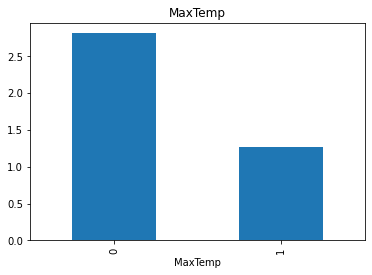

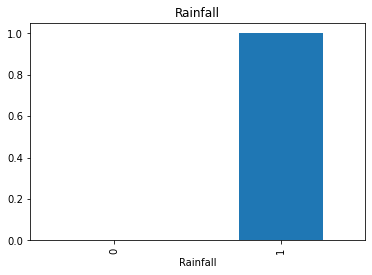

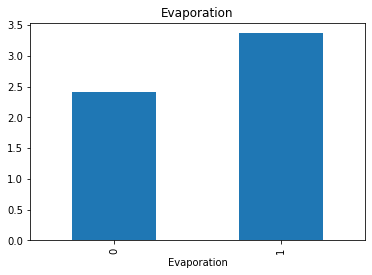

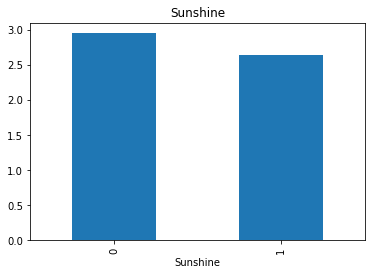

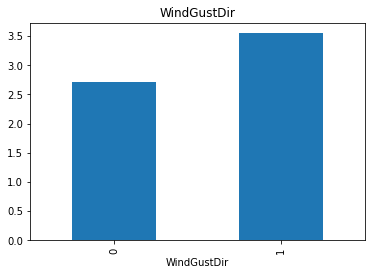

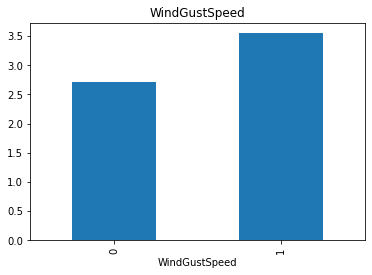

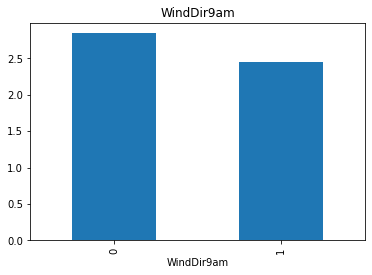

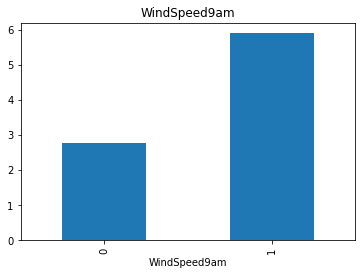

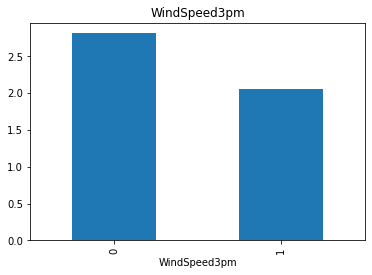

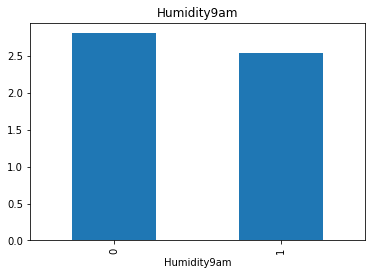

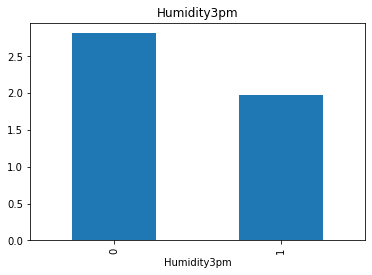

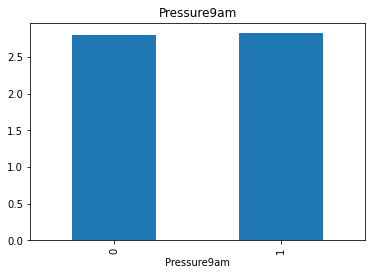

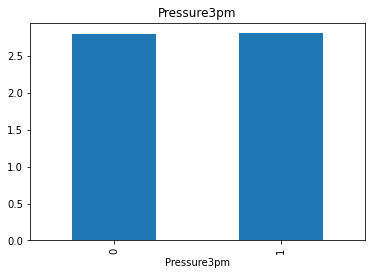

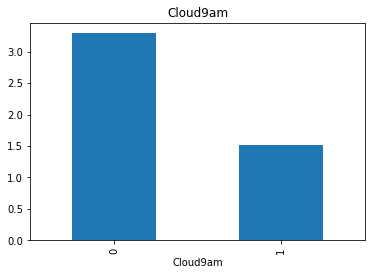

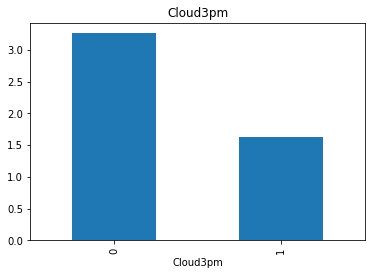

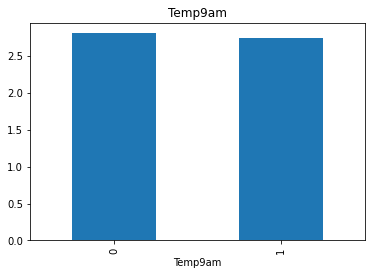

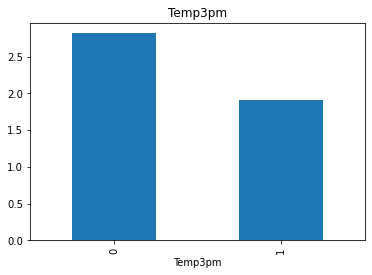

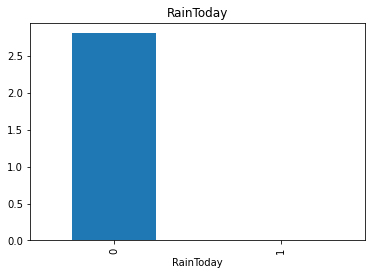

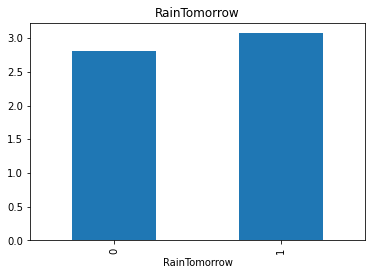

In [18]:
for feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or 0 otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean rainfall where the information is missing or present
    data.groupby(feature)['Rainfall'].mean().plot.bar()
    plt.title(feature)
    plt.show()

In [19]:
df.dtypes.value_counts()

float64    16
object      7
dtype: int64

In [20]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  16


MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   
3      9.2     28.0       0.0          NaN       NaN           24.0   
4     17.5     32.3       1.0          NaN       NaN           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0       1007.1       8.0       NaN     16.9     21.8  
1       1007.8       NaN       NaN     17.2     24.3  
2       1008.7       NaN       2.0     21.0     23.2  
3       1012.8       NaN       NaN     18.1     26.5  
4       1006.0       7.0       8.0     17.8     29.7

### Observation - 
Dropping below features with maximum missing values - 
1. Evaporation
2. Sunshine
3. Cloud9am
4. Cloud3am

In [21]:
df.drop('Evaporation', axis=1, inplace=True)

In [22]:
df.drop('Sunshine', axis=1, inplace=True)
df.drop('Cloud9am', axis=1, inplace=True)

In [23]:
df.drop('Cloud3pm', axis=1, inplace=True)

In [24]:
df.shape

(8425, 19)

In [25]:
from sympy.polys.domains import ZZ

In [26]:
features_with_na.remove('Evaporation')
features_with_na.remove('Sunshine')
features_with_na.remove('Cloud9am')
features_with_na.remove('Cloud3pm')

In [27]:
# checking null values
print('Total Number of missing values in data set are', df.isnull().sum().sum())

Total Number of missing values in data set are 7090


In [28]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

In [29]:
features_with_na

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

### Observation - 
- For remaining set of missing data, we have chosen median imputation.

In [30]:
df.fillna(df.median(), inplace=True)

In [31]:
# checking null values
print('Total Number of missing values in data set are', df.isnull().sum().sum())

Total Number of missing values in data set are 2607


In [32]:
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

In [33]:
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [34]:
# checking null values
print('Total Number of missing values in data set are', df.isnull().sum().sum())

Total Number of missing values in data set are 0


In [35]:
# Removing duplicate values
df.duplicated().sum()

1663

In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df.shape

(6762, 19)

In [38]:
df.drop('Date', axis=1, inplace=True)

## Seperating Data as categorical and Numerical Data

In [39]:
# Seperating Data as categorical and Numerical Data
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [40]:
categorical_features

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [41]:
numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [42]:
print(f'Total Categorical Features are {len(categorical_features)}')
print(f'Total Numerical Features are {len(numerical_features)}')

Total Categorical Features are 6
Total Numerical Features are 12


# Countplots for Categorical Feature

In [43]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Location: Number of unique values 12
MinTemp: Number of unique values 285
MaxTemp: Number of unique values 331
Rainfall: Number of unique values 250
WindGustDir: Number of unique values 16
WindGustSpeed: Number of unique values 52
WindDir9am: Number of unique values 16
WindDir3pm: Number of unique values 16
WindSpeed9am: Number of unique values 34
WindSpeed3pm: Number of unique values 35
Humidity9am: Number of unique values 90
Humidity3pm: Number of unique values 94
Pressure9am: Number of unique values 384
Pressure3pm: Number of unique values 374
Temp9am: Number of unique values 304
Temp3pm: Number of unique values 328
RainToday: Number of unique values 2
RainTomorrow: Number of unique values 2


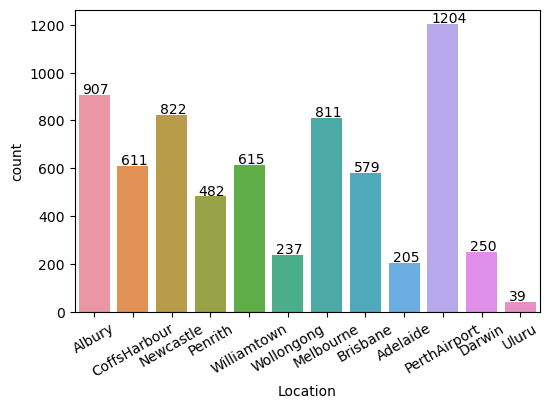

In [44]:
plt.figure(dpi=100)
plot = sns.countplot('Location',data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

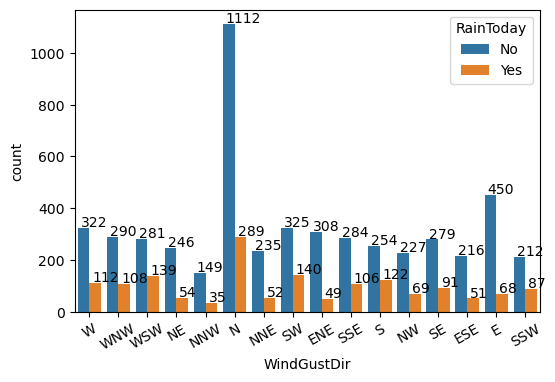

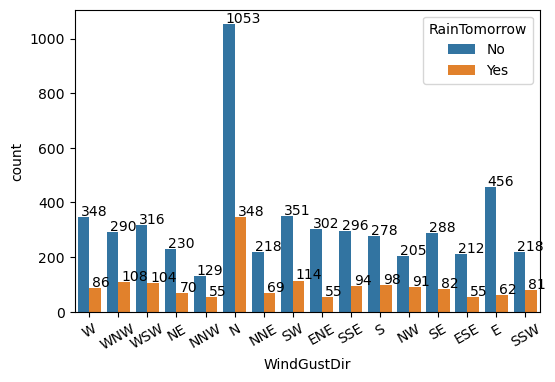

In [45]:
plt.figure(dpi=100)
plot = sns.countplot('WindGustDir',data=df, hue='RainToday')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
    
    
plt.figure(dpi=100)
plot = sns.countplot('WindGustDir',data=df, hue='RainTomorrow')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

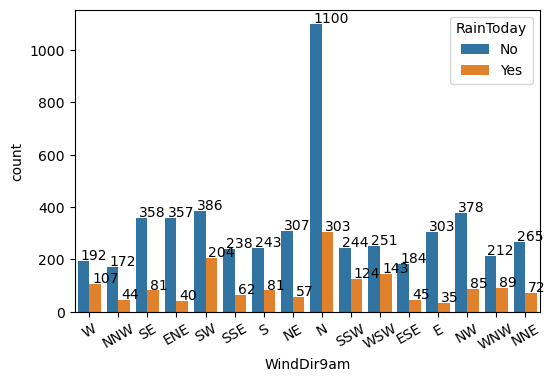

In [46]:
plt.figure(dpi=100)
plot = sns.countplot('WindDir9am',data=df, hue='RainToday')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
    
    
plt.figure(dpi=100)
plot = sns.countplot('WindDir9am',data=df, hue='RainTomorrow')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

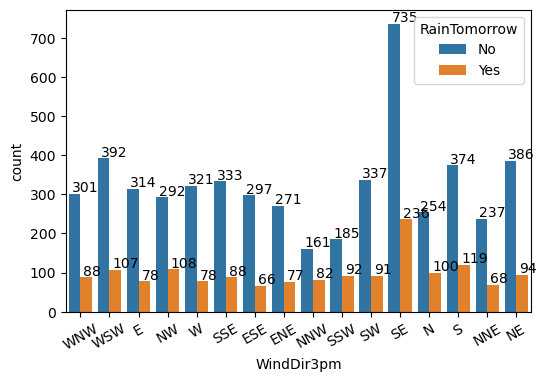

In [47]:
plt.figure(dpi=100)
plot = sns.countplot('WindDir3pm',data=df, hue='RainToday')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
    
    
plt.figure(dpi=100)
plot = sns.countplot('WindDir3pm',data=df, hue='RainTomorrow')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

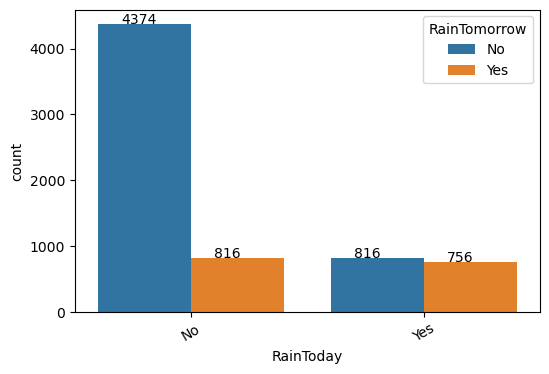

In [48]:
plt.figure(dpi=100)
plot = sns.countplot('RainToday',data=df, hue='RainTomorrow')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))


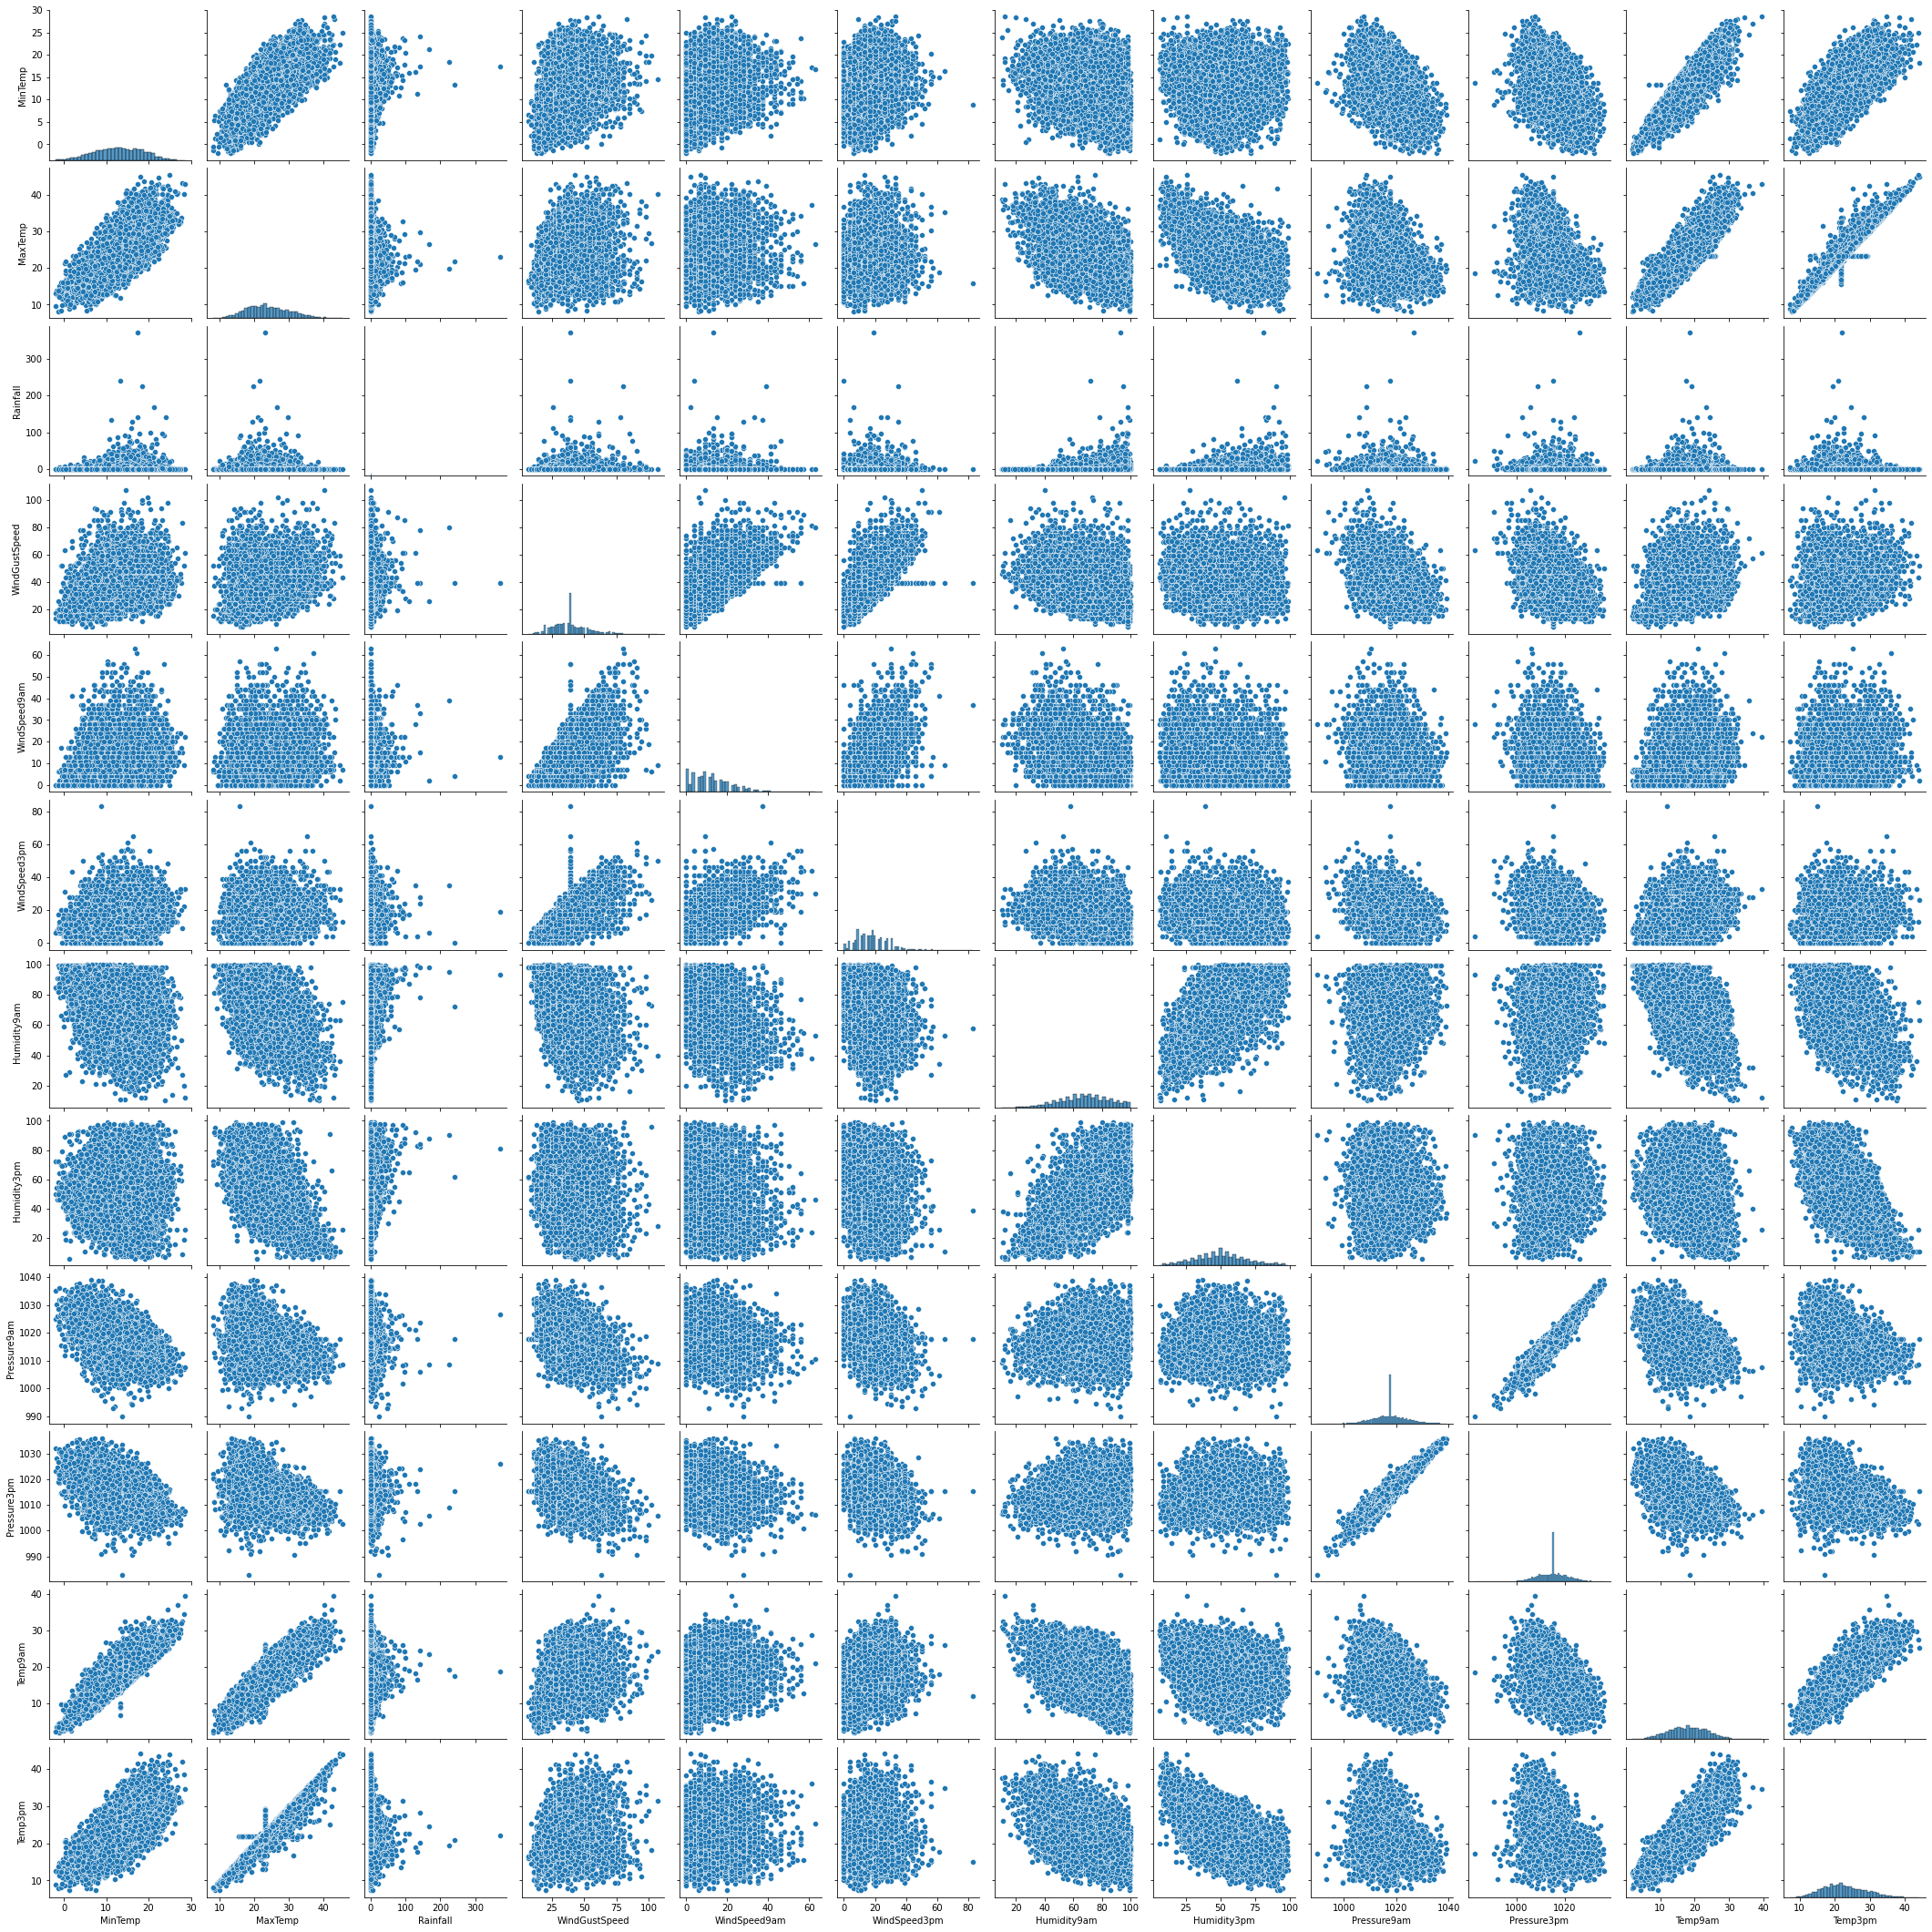

In [49]:
sns.pairplot(df)

<AxesSubplot:>

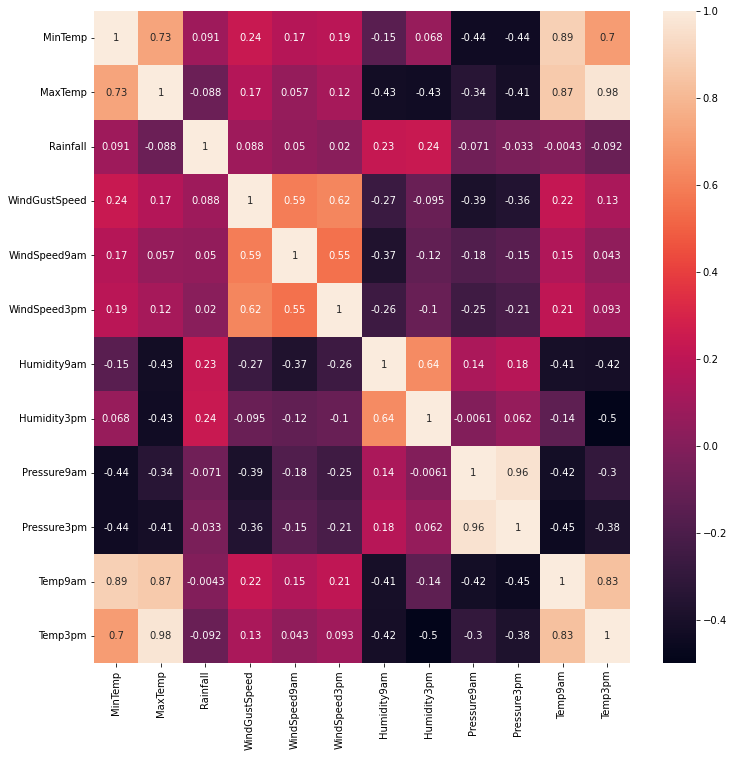

In [50]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

## Handling Outliers

MinTemp             AxesSubplot(0.125,0.787927;0.168478x0.0920732)
MaxTemp          AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
Rainfall         AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
WindGustSpeed    AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
WindSpeed9am        AxesSubplot(0.125,0.677439;0.168478x0.0920732)
WindSpeed3pm     AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
Humidity9am      AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
Humidity3pm      AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
Pressure9am         AxesSubplot(0.125,0.566951;0.168478x0.0920732)
Pressure3pm      AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
Temp9am          AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
Temp3pm          AxesSubplot(0.731522,0.566951;0.168478x0.0920732)
dtype: object

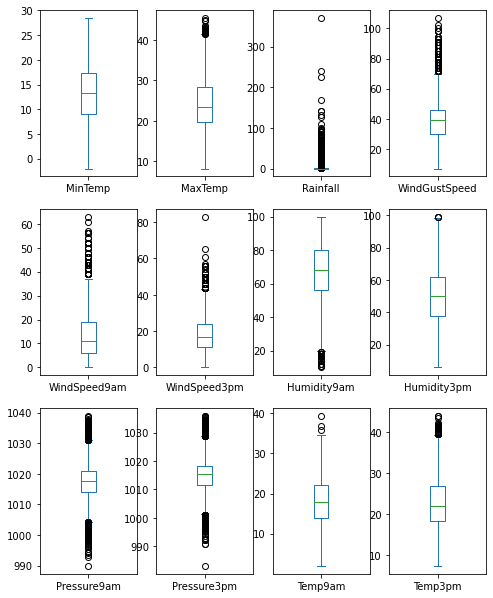

In [51]:
df.plot(kind='box',subplots=True,figsize=(8,25),layout=(7,4))
# plotting individual graph for better understanding of graph

In [52]:
cols_with_outliers = ['MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

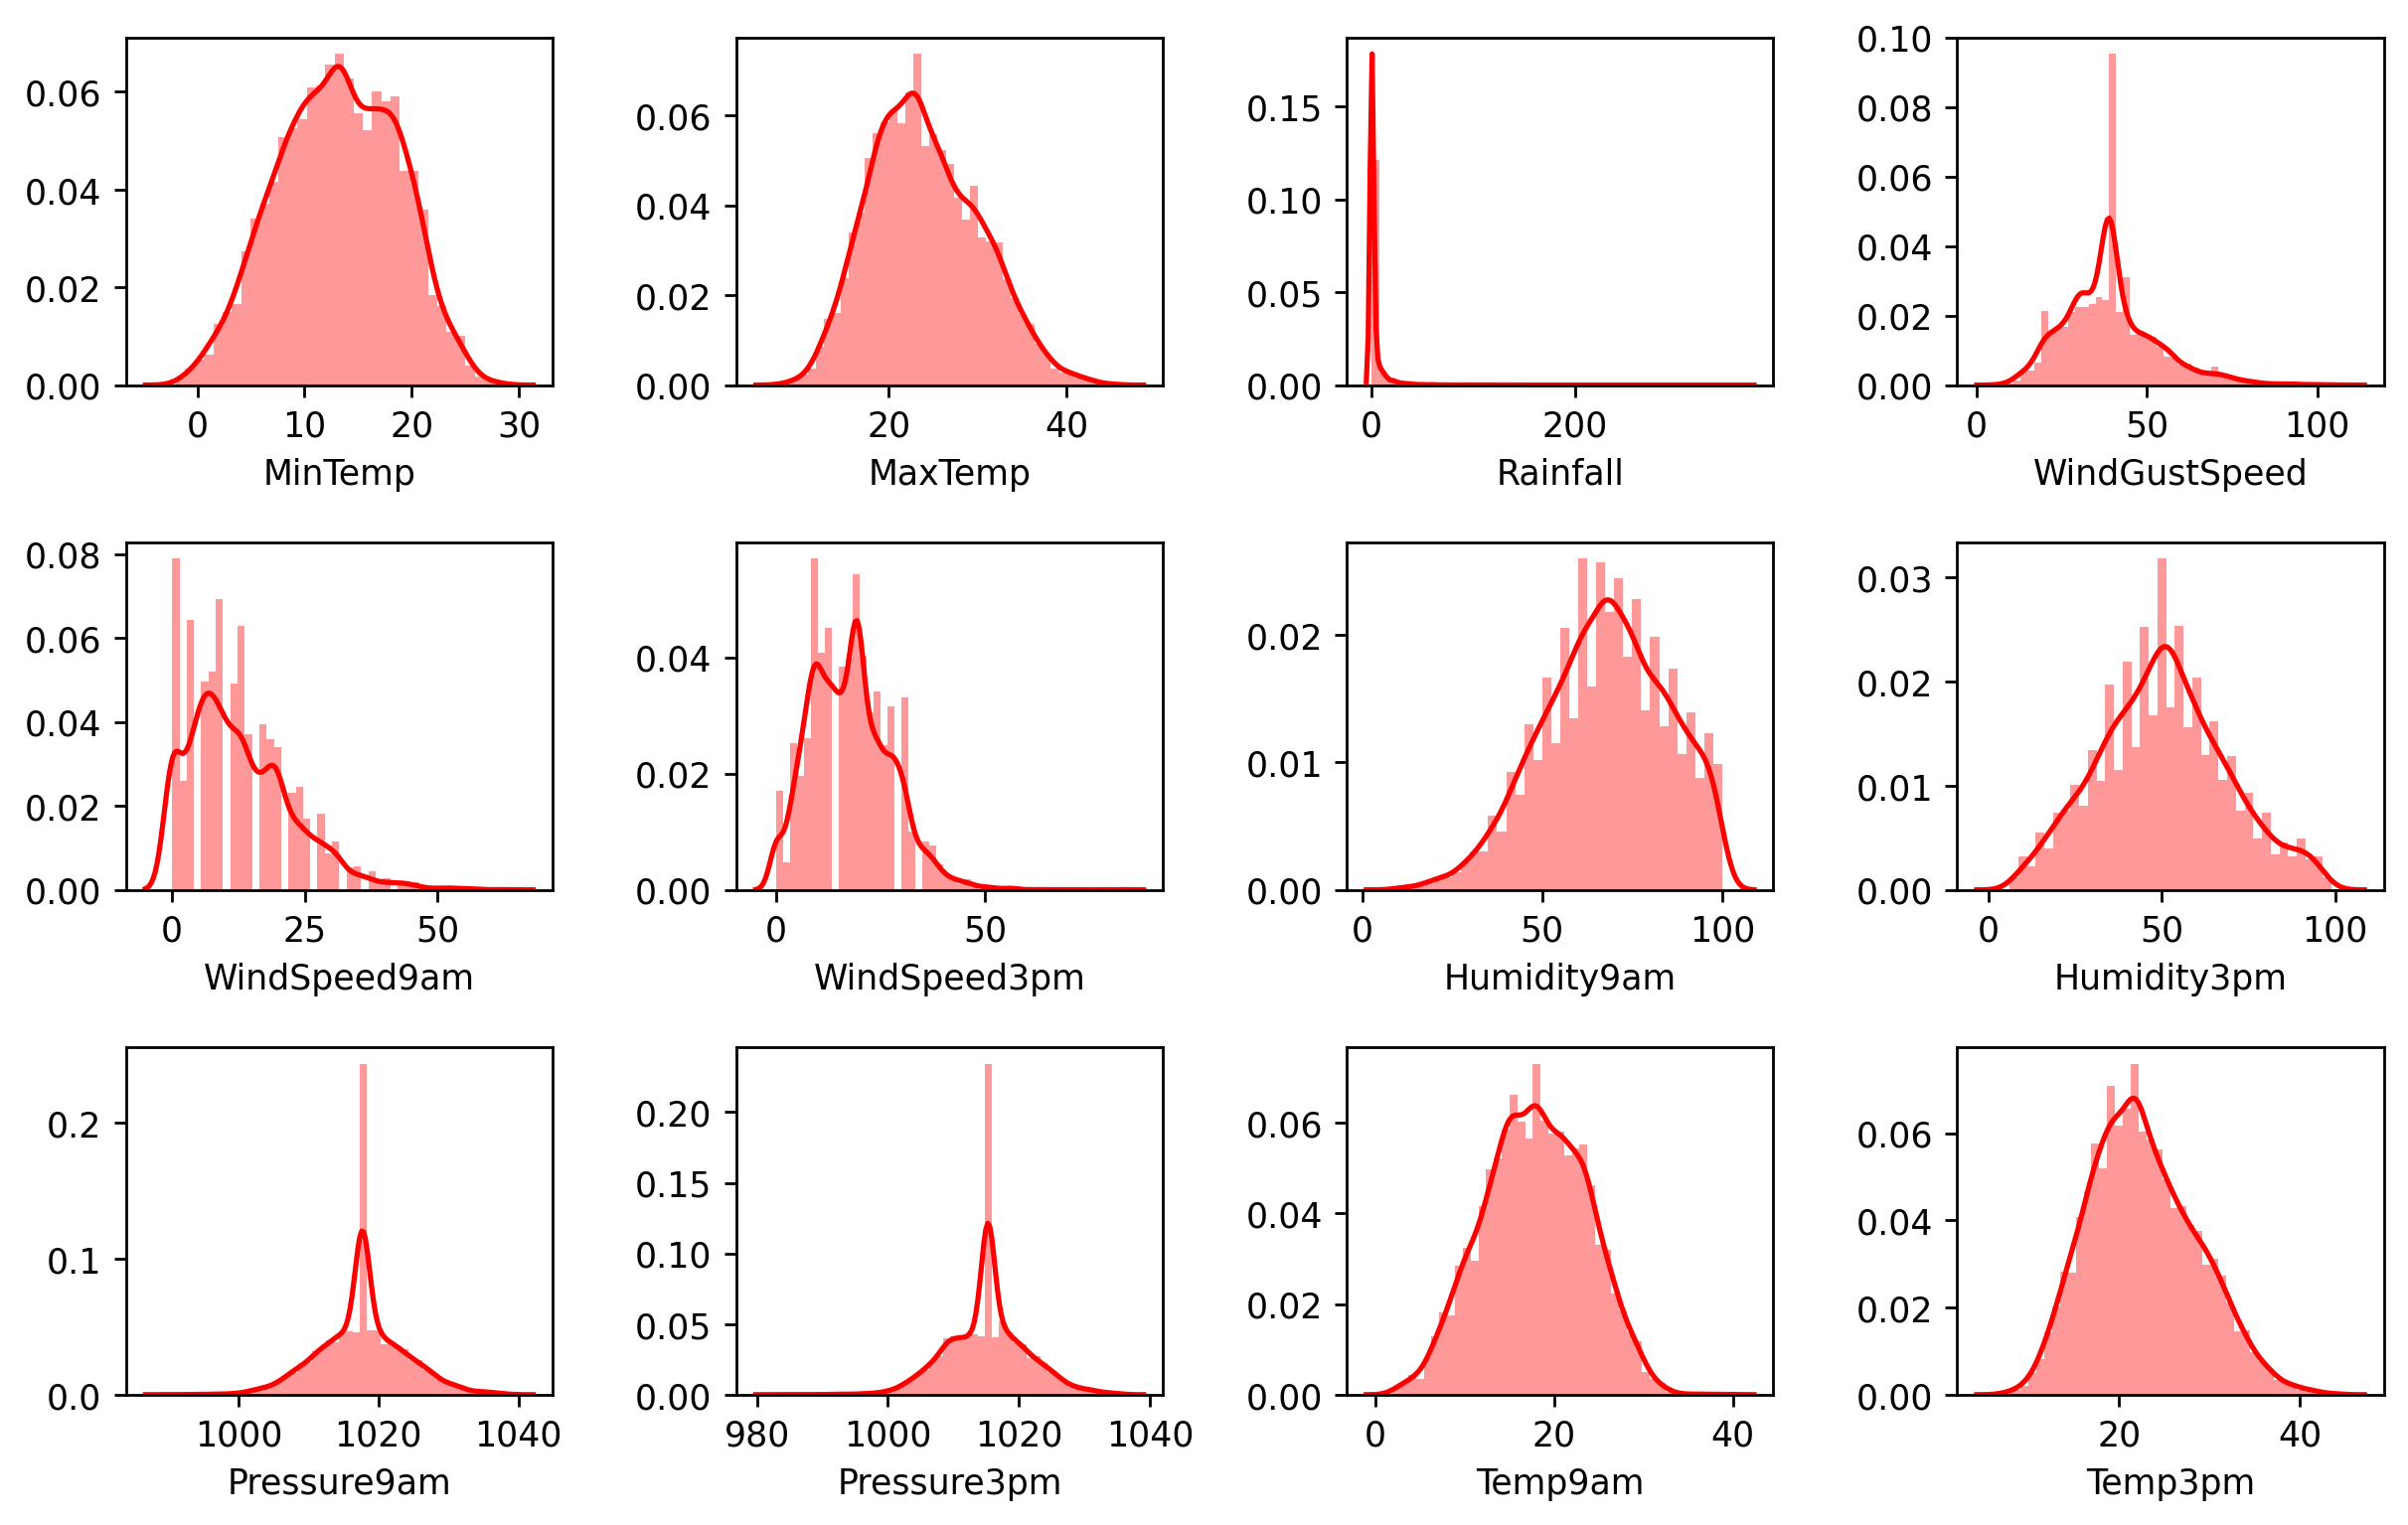

In [53]:
plt.figure(figsize = (10, 10), dpi=250)
for i in range(0, len(numerical_features)):
    plt.subplot(5, 4, i+1)
    sns.distplot(df[numerical_features[i]], color = 'red')
    plt.ylabel('')

# plt.suptitle('Outliers Before Cleansing', y = 0.1)
plt.tight_layout(pad = 1.5)
plt.show()

In [54]:
df.skew().sort_values()

Humidity9am      -0.256862
MinTemp          -0.084774
Temp9am          -0.046837
Pressure9am       0.014989
Pressure3pm       0.025431
Humidity3pm       0.149630
MaxTemp           0.330804
Temp3pm           0.353465
WindSpeed3pm      0.542938
WindGustSpeed     0.779739
WindSpeed9am      0.956407
Rainfall         13.637400
dtype: float64

In [55]:
for feature in cols_with_outliers:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    upper_bond = df[feature].quantile(0.75) + (IQR * 1.5)
    lower_bond = df[feature].quantile(0.25) - (IQR * 1.5)
    
    df[feature] = np.where(df[feature]>upper_bond,upper_bond,df[feature])
    df[feature] = np.where(df[feature]<lower_bond,lower_bond,df[feature])

MinTemp             AxesSubplot(0.125,0.787927;0.168478x0.0920732)
MaxTemp          AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
Rainfall         AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
WindGustSpeed    AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
WindSpeed9am        AxesSubplot(0.125,0.677439;0.168478x0.0920732)
WindSpeed3pm     AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
Humidity9am      AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
Humidity3pm      AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
Pressure9am         AxesSubplot(0.125,0.566951;0.168478x0.0920732)
Pressure3pm      AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
Temp9am          AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
Temp3pm          AxesSubplot(0.731522,0.566951;0.168478x0.0920732)
dtype: object

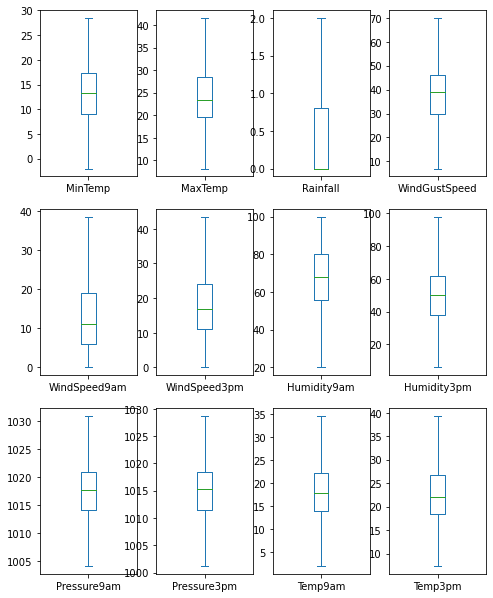

In [56]:
df.plot(kind='box',subplots=True,figsize=(8,25),layout=(7,4))
# plotting individual graph for better understanding of graph

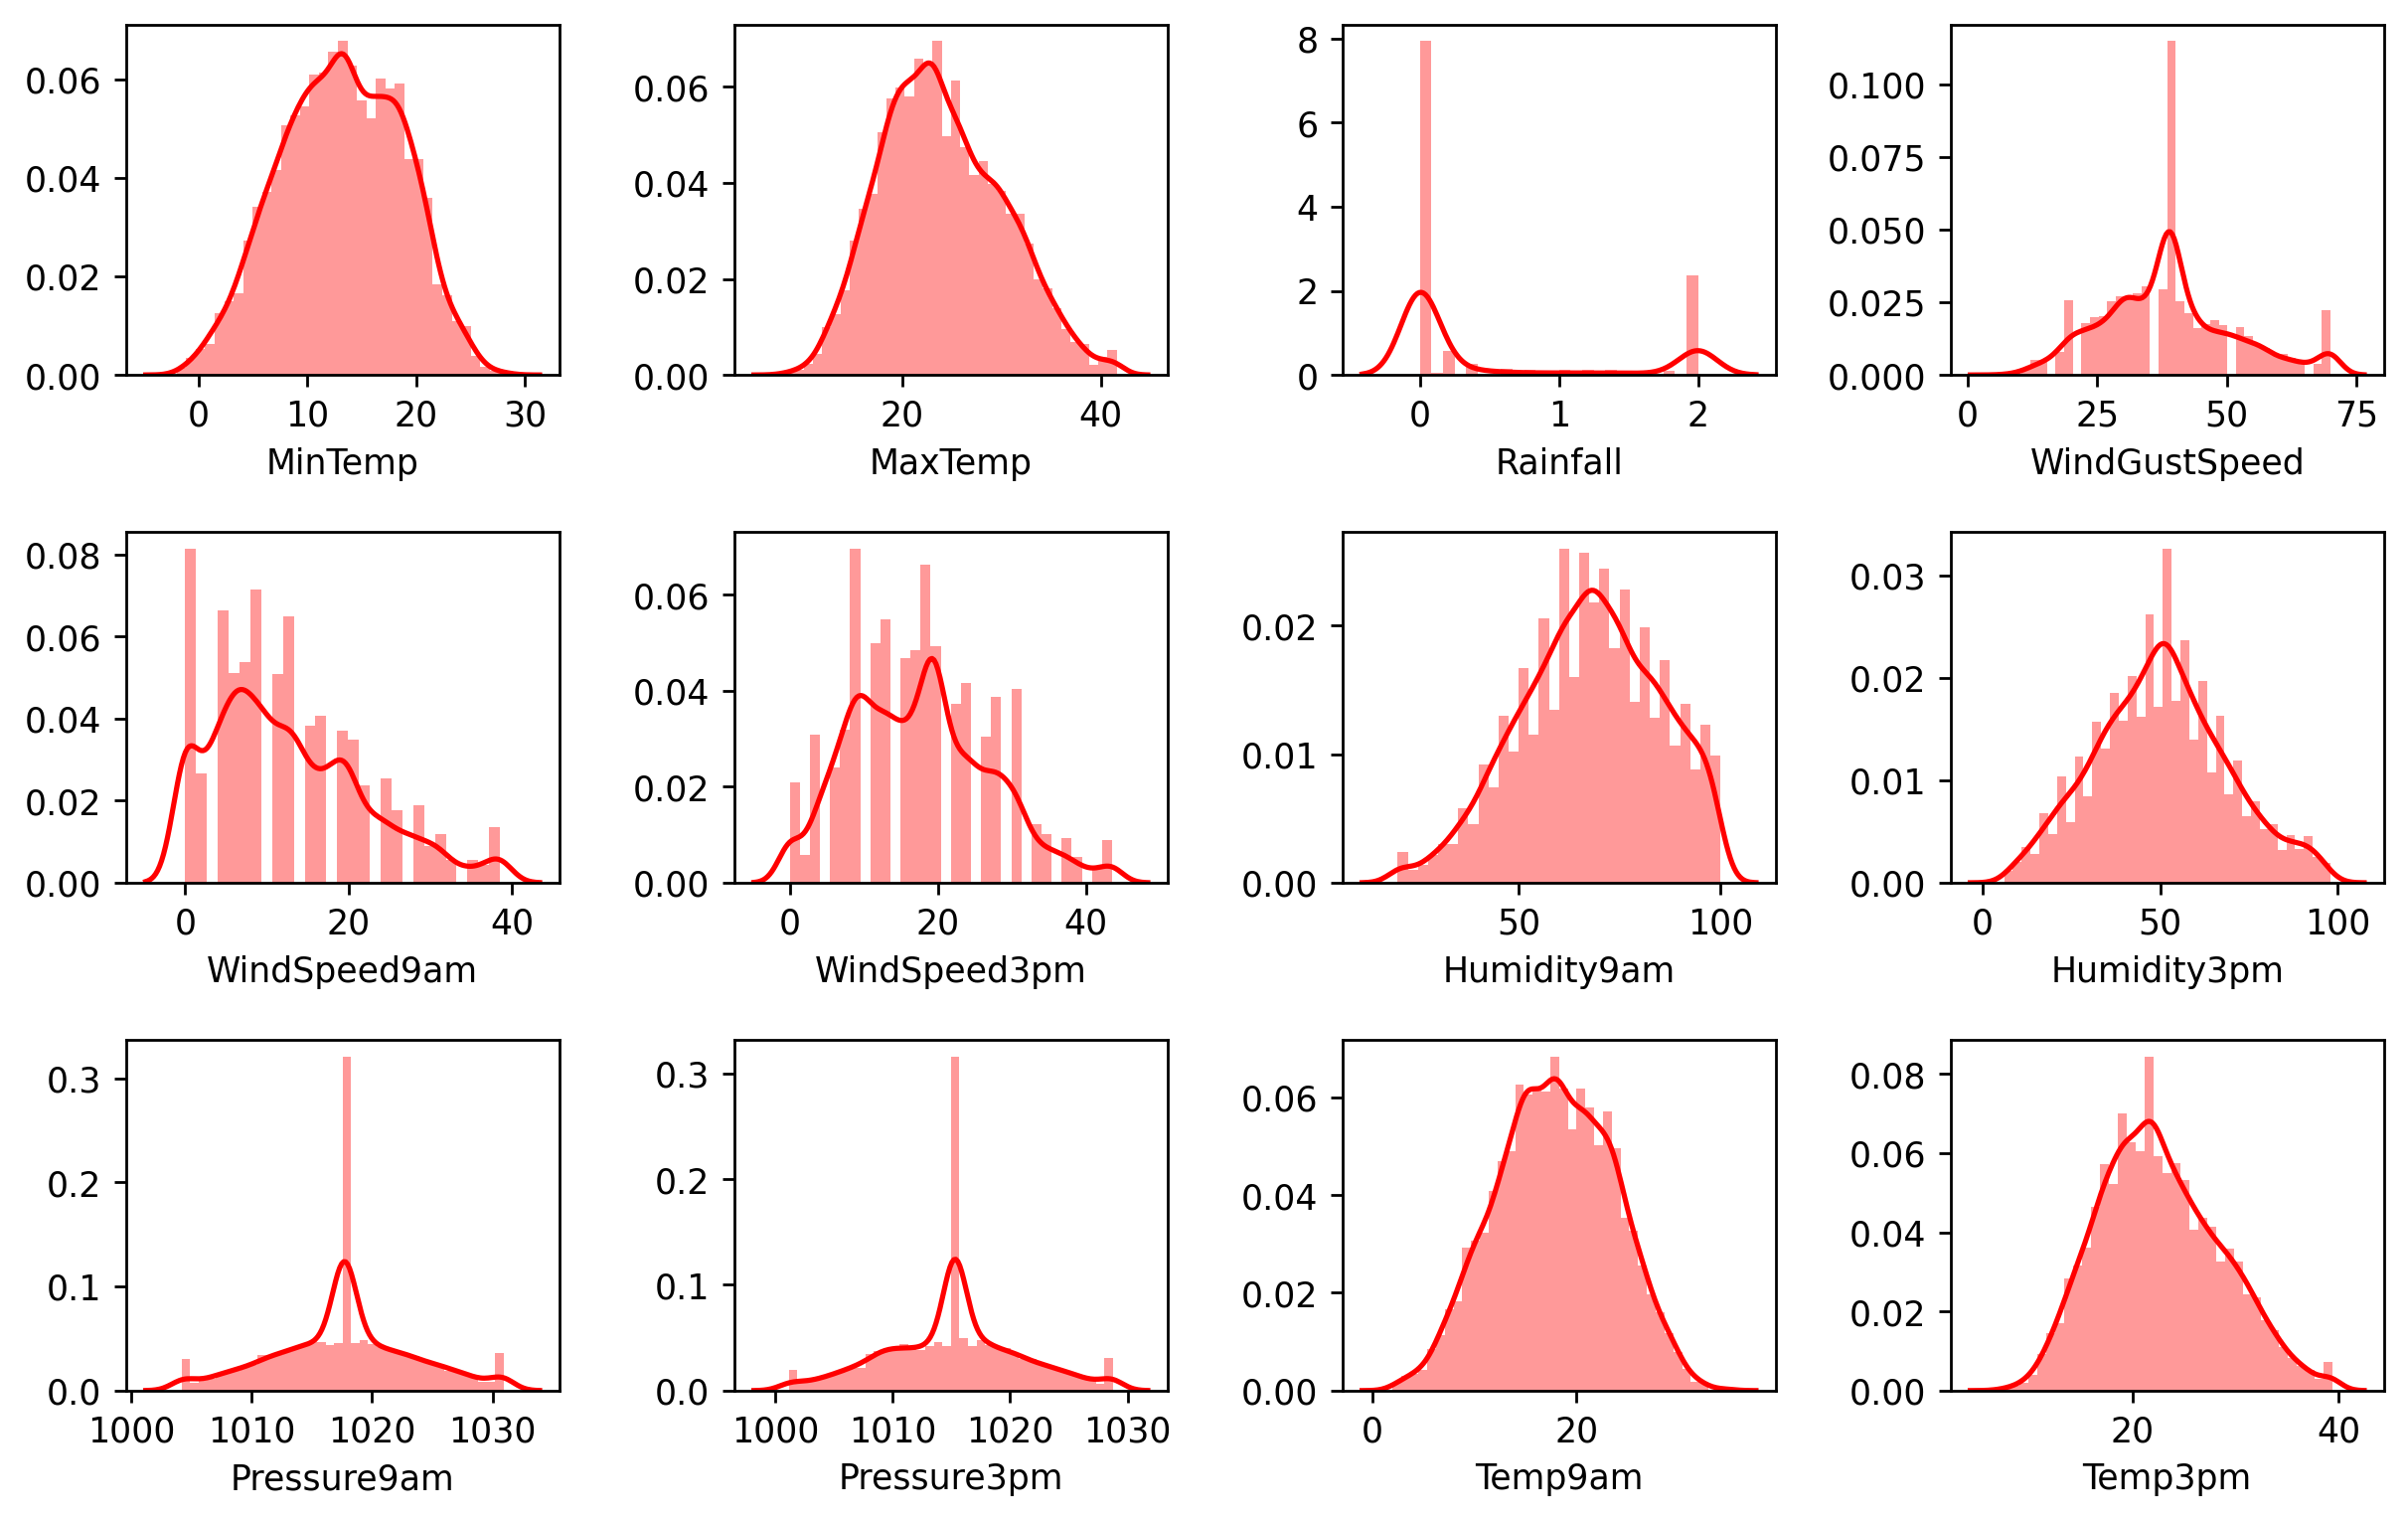

In [57]:
plt.figure(figsize = (10, 10), dpi=250)
for i in range(0, len(numerical_features)):
    plt.subplot(5, 4, i+1)
    sns.distplot(df[numerical_features[i]], color = 'red')
    plt.ylabel('')

# plt.suptitle('Outliers Before Cleansing', y = 0.1)
plt.tight_layout(pad = 1.5)
plt.show()

## Checking Correlation

<AxesSubplot:>

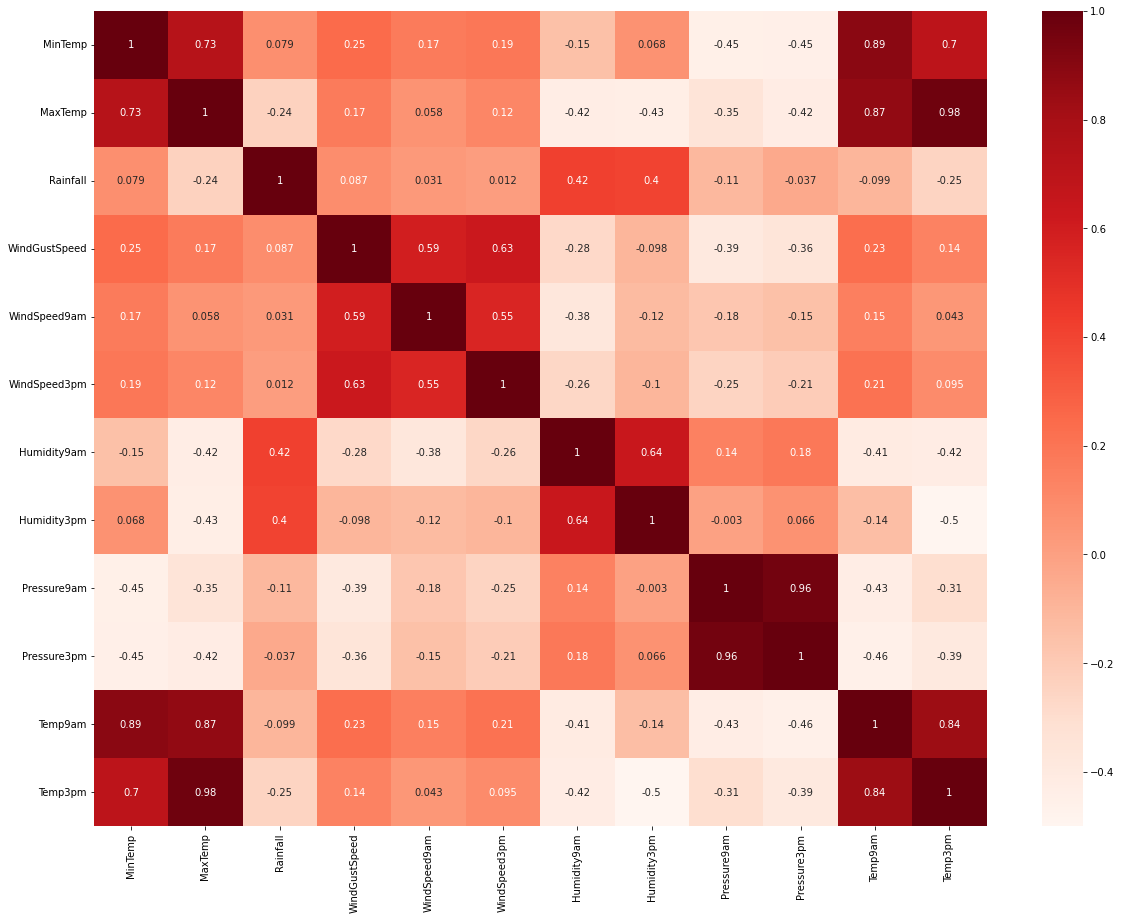

In [58]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='Reds',annot=True)

In [59]:
df.skew().sort_values()

Humidity9am     -0.239061
MinTemp         -0.084774
Temp9am         -0.052829
Pressure9am      0.017408
Pressure3pm      0.024898
Humidity3pm      0.149245
MaxTemp          0.316896
Temp3pm          0.328536
WindSpeed3pm     0.382434
WindGustSpeed    0.462047
WindSpeed9am     0.714543
Rainfall         1.212775
dtype: float64

# Label Encoding

In [80]:
df2 = df.copy()

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
label_=LabelEncoder()

for i in categorical_features:
    df[i]=label_.fit_transform(df[i])

In [81]:
label_=LabelEncoder()

for i in categorical_features:
    df2[i]=label_.fit_transform(df2[i])

In [72]:
df.head()

Location  MinTemp  MaxTemp  WindGustDir  WindGustSpeed  WindDir9am  \
0         1     13.4     22.9           13           44.0          13   
1         1      7.4     25.1           14           44.0           6   
2         1     12.9     25.7           15           46.0          13   
3         1      9.2     28.0            4           24.0           9   
4         1     17.5     32.3           13           41.0           1   

   WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          14          20.0          24.0         71.0         22.0   
1          15           4.0          22.0         44.0         25.0   
2          15          19.0          26.0         38.0         30.0   
3           0          11.0           9.0         45.0         16.0   
4           7           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  
0       1007.7       1007.1     16.9     21.8          0             0  
1       1010.6       1007.8     17.2     24.3          0             0  
2       1007.6       1008.7     21.0     23.2          0             0  
3       1017.6       1012.8     18.1     26.5          0             0  
4       1010.8       1006.0     17.8     29.7          0             0

## Variance Inflation Factor

In [64]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [65]:
y1 = df['Rainfall']

In [66]:
df.drop('Rainfall', axis=1, inplace=True)
x1 = df.copy()

In [82]:
y2 = df2['RainTomorrow']

In [83]:
df2.drop('RainTomorrow', axis=1, inplace=True)
x2 = df2.copy()

In [70]:
x1.shape

(6762, 17)

In [71]:
x2.shape

(6762, 17)

### Observation 
- x1, y1 = For Rainfall Prediction
- x2, y2 = For RainTomorrow Prediction

In [73]:
calc_vif(x1)

variables     VIF FACTOR
0        Location       4.505368
1         MinTemp      51.959727
2         MaxTemp     434.533661
3     WindGustDir       4.936489
4   WindGustSpeed      23.330087
5      WindDir9am       4.450551
6      WindDir3pm       5.854824
7    WindSpeed9am       5.774253
8    WindSpeed3pm       8.738077
9     Humidity9am      66.990764
10    Humidity3pm      48.197416
11    Pressure9am  605043.910198
12    Pressure3pm  604554.112462
13        Temp9am     183.975553
14        Temp3pm     508.725096
15      RainToday       1.849736
16   RainTomorrow       1.870034

In [74]:
x1.drop('Pressure9am', axis=1, inplace=True)
x1.drop('Pressure3pm', axis=1, inplace=True)
x1.drop('Temp3pm', axis=1, inplace=True)

calc_vif(x1)

variables  VIF FACTOR
0        Location    4.490460
1         MinTemp   38.044447
2         MaxTemp  123.287903
3     WindGustDir    4.863471
4   WindGustSpeed   21.590534
5      WindDir9am    4.109018
6      WindDir3pm    5.501384
7    WindSpeed9am    5.342130
8    WindSpeed3pm    8.672267
9     Humidity9am   43.866685
10    Humidity3pm   29.946254
11        Temp9am  165.556107
12      RainToday    1.814659
13   RainTomorrow    1.809421

In [75]:
x1.drop('MaxTemp', axis=1, inplace=True)
x1.drop('Temp9am', axis=1, inplace=True)

calc_vif(x1)

variables  VIF FACTOR
0        Location    4.431528
1         MinTemp    6.739712
2     WindGustDir    4.854197
3   WindGustSpeed   19.444779
4      WindDir9am    4.072458
5      WindDir3pm    5.448169
6    WindSpeed9am    5.286735
7    WindSpeed3pm    8.435839
8     Humidity9am   21.117858
9     Humidity3pm   18.033297
10      RainToday    1.584430
11   RainTomorrow    1.766774

In [76]:
x1.drop('WindGustSpeed', axis=1, inplace=True)
x1.drop('Humidity3pm', axis=1, inplace=True)

calc_vif(x1)

variables  VIF FACTOR
0      Location    4.332969
1       MinTemp    5.910606
2   WindGustDir    4.852417
3    WindDir9am    3.972409
4    WindDir3pm    5.243860
5  WindSpeed9am    4.396510
6  WindSpeed3pm    6.729624
7   Humidity9am    8.710391
8     RainToday    1.575840
9  RainTomorrow    1.518521

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0      Albury     13.4     22.9       0.6           W           44.0   
1      Albury      7.4     25.1       0.0         WNW           44.0   
2      Albury     12.9     25.7       0.0         WSW           46.0   
3      Albury      9.2     28.0       0.0          NE           24.0   
4      Albury     17.5     32.3       1.0           W           41.0   
...       ...      ...      ...       ...         ...            ...   
8420    Uluru      2.8     23.4       0.0           E           31.0   
8421    Uluru      3.6     25.3       0.0         NNW           22.0   
8422    Uluru      5.4     26.9       0.0           N           37.0   
8423    Uluru      7.8     27.0       0.0          SE           28.0   
8424    Uluru     14.9     23.3       0.0           N           39.0   

     WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0             W        WNW          20.0          24.0         71.0   
1           NNW        WSW           4.0          22.0         44.0   
2             W        WSW          19.0          26.0         38.0   
3            SE          E          11.0           9.0         45.0   
4           ENE         NW           7.0          20.0         82.0   
...         ...        ...           ...           ...          ...   
8420         SE        ENE          13.0          11.0         51.0   
8421         SE          N          13.0           9.0         56.0   
8422         SE        WNW           9.0           9.0         53.0   
8423        SSE          N          13.0           7.0         51.0   
8424        ESE        ESE          17.0          17.0         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday  
0            22.0       1007.7       1007.1     16.9     21.8        No  
1            25.0       1010.6       1007.8     17.2     24.3        No  
2            30.0       1007.6       1008.7     21.0     23.2        No  
3            16.0       1017.6       1012.8     18.1     26.5        No  
4            33.0       1010.8       1006.0     17.8     29.7        No  
...           ...          ...          ...      ...      ...       ...  
8420         24.0       1024.6       1020.3     10.1     22.4        No  
8421         21.0       1023.5       1019.1     10.9     24.5        No  
8422         24.0       1021.0       1016.8     12.5     26.1        No  
8423         24.0       1019.4       1016.5     15.1     26.0        No  
8424         36.0       1020.2       1017.9     15.0     20.9        No  

[6762 rows x 17 columns]

In [84]:
calc_vif(x2)

variables     VIF FACTOR
0        Location       4.487934
1         MinTemp      51.952841
2         MaxTemp     433.994215
3     WindGustDir       4.926106
4   WindGustSpeed      22.240955
5      WindDir9am       4.450263
6      WindDir3pm       5.852676
7    WindSpeed9am       5.773785
8    WindSpeed3pm       8.710730
9     Humidity9am      66.990756
10    Humidity3pm      45.476072
11    Pressure9am  602466.046190
12    Pressure3pm  601777.536459
13        Temp9am     183.771791
14        Temp3pm     508.679686
15      RainToday       1.809287

In [85]:
x2.drop('Pressure3pm', axis=1, inplace=True)
x2.drop('Pressure9am', axis=1, inplace=True)
calc_vif(x2)

variables  VIF FACTOR
0        Location    4.472321
1         MinTemp   37.875821
2         MaxTemp  433.813627
3     WindGustDir    4.868807
4   WindGustSpeed   20.904916
5      WindDir9am    4.097010
6      WindDir3pm    5.487798
7    WindSpeed9am    5.391491
8    WindSpeed3pm    8.691986
9     Humidity9am   57.674149
10    Humidity3pm   39.427740
11        Temp9am  180.851025
12        Temp3pm  460.313970
13      RainToday    1.775397

In [86]:
x2.drop('MaxTemp', axis=1, inplace=True)
x2.drop('Temp3pm', axis=1, inplace=True)
x2.drop('Temp9am', axis=1, inplace=True)

calc_vif(x2)

variables  VIF FACTOR
0        Location    4.400583
1         MinTemp    6.704886
2     WindGustDir    4.851438
3   WindGustSpeed   18.988511
4      WindDir9am    4.050047
5      WindDir3pm    5.420571
6    WindSpeed9am    5.283633
7    WindSpeed3pm    8.407202
8     Humidity9am   20.471820
9     Humidity3pm   15.763898
10      RainToday    1.503599

In [87]:
x2.drop('Humidity9am', axis=1, inplace=True)
x2.drop('WindGustSpeed', axis=1, inplace=True)

calc_vif(x2)

variables  VIF FACTOR
0      Location    4.067822
1       MinTemp    5.910453
2   WindGustDir    4.808393
3    WindDir9am    4.006824
4    WindDir3pm    5.076184
5  WindSpeed9am    4.236343
6  WindSpeed3pm    6.681459
7   Humidity3pm    6.948917
8     RainToday    1.497291

# -- Raining/Not-Raining Model

In [91]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

In [90]:
#model developemnt libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier# Load data


In [92]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=43)

************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7753141167775314
Cross-val-score= 0.7615112617238311


roc_auc_score 0.6958413926499033


              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1034
           1       0.52      0.55      0.53       319

    accuracy                           0.78      1353
   macro avg       0.69      0.70      0.69      1353
weighted avg       0.78      0.78      0.78      1353



[[875 159]
 [145 174]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


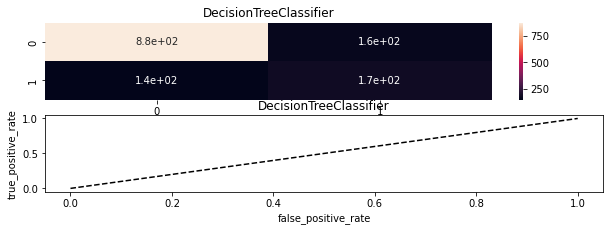

************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.8307464892830746
Cross-val-score= 0.8312083247757922


roc_auc_score 0.7028446608417261


              precision    recall  f1-score   support

           0       0.85      0.94      0.90      1034
           1       0.72      0.46      0.56       319

    accuracy                           0.83      1353
   macro avg       0.79      0.70      0.73      1353
weighted avg       0.82      0.83      0.82      1353



[[977  57]
 [172 147]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.8167036215816703
Cross-val-score= 0.8129075100978982


roc_auc_score 0.6849863269525778


              precision    recall  f1-score   support

           0       0.84      0.93      0.89      1034
           1       0.67      0.44      0.53       319

    accuracy                           0.82      1353
   macro avg       0.76      0.68      0.71      1353
weighted avg       0.80      0.82      0.80      1353



[[966  68]
 [180 139]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


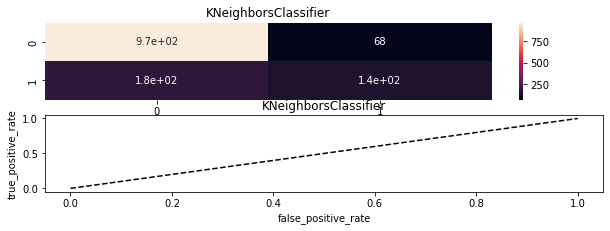

************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.7967479674796748
Cross-val-score= 0.773346340795509


roc_auc_score 0.577636230240779


              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1034
           1       0.87      0.16      0.27       319

    accuracy                           0.80      1353
   macro avg       0.83      0.58      0.58      1353
weighted avg       0.81      0.80      0.74      1353



[[1026    8]
 [ 267   52]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


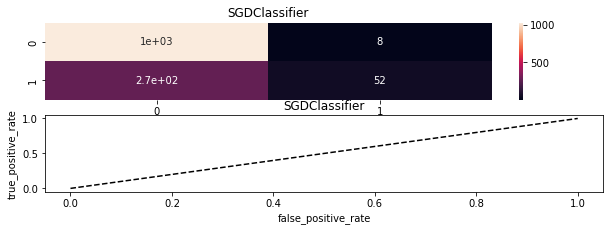

************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.827790096082779
Cross-val-score= 0.8267693571575272


roc_auc_score 0.6922397118655372


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1034
           1       0.72      0.44      0.54       319

    accuracy                           0.83      1353
   macro avg       0.78      0.69      0.72      1353
weighted avg       0.82      0.83      0.81      1353



[[981  53]
 [180 139]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


In [94]:
#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10)
    # ---------------------------------------------------------------------------------------------------------
    
    cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    # ---------------------------------------------------------------------------------------------------------
        
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

In [95]:
for i in [i for i in range(0, 101, 3)]:
    x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3,random_state=i)
    
    
    # To Prevent Data Leakages, We are scaling data for each train and test. To keep, 
    sc=StandardScaler()
    x_train=sc.fit_transform(x_train)
    x_test=sc.fit_transform(x_test)
    
    
    dtc=DecisionTreeClassifier()
    rfc=RandomForestClassifier()
    lg=LogisticRegression()
    knc=KNeighborsClassifier()
    sgc=SGDClassifier()
    svc = LinearSVC()
    gbc = GradientBoostingClassifier()
    gnb = GaussianNB()
    
    
    seed=7
    #prepare models
    models=[]
    models.append(('DecisionTreeClassifier',dtc))
    models.append(('RandomForestClassifier',rfc))
    models.append(('KNeighborsClassifier',knc))
    models.append(('SGDClassifier',sgc))
    models.append(('LogisticRegression',lg))
    models.append(('LinearSVC', svc))
    models.append(('GradientBoostingClassifier', gbc))
    models.append(('GaussianNB', gnb))
    
    
    
    #evaluate each model in turn ----------------------------------------------------------------------------------------
    Model=[]
    cvs=[]
    score=[]
    rocscore=[]
    for name,model in models:
        # print('**************',name,'***********')
        # print('\n')
        Model.append(name)
        model.fit(x_train,y_train)
        # print(model)
        pred=model.predict(x_test)
        # print('\n')
        acc=accuracy_score(y_test,pred)
        # print('accuracy score',acc)
        score.append(acc*100)
        kfold=model_selection.KFold(n_splits=10)
        # ---------------------------------------------------------------------------------------------------------

        cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
        # print('Cross-val-score=',cv)
        cvs.append(cv*100)
        # print('\n')
        # ---------------------------------------------------------------------------------------------------------

        false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
        roc_auc=roc_auc_score(y_test,pred)
        # print('roc_auc_score',roc_auc)
        rocscore.append(roc_auc*100)
        # print('\n')
        # print(classification_report(y_test,pred))
        # print('\n')
        cm=confusion_matrix(y_test,pred)
        # print(cm)
        # print('\n')
        # plt.figure(figsize=(10,15))
        # plt.subplot(911)
        # plt.title(name)
        # print(sns.heatmap(cm,annot=True))
        # plt.subplot(912)
        # plt.title(name)

        # plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
        # plt.plot([0,1],[0,1],'k--')
        # plt.xlabel('false_positive_rate')
        # plt.ylabel('true_positive_rate')
        # plt.show()

        
    result=pd.DataFrame({'Model':Model, 'cvs' :cvs, 'score' :score, 'rocscore' :rocscore}, columns=['Model', 'cvs','score','rocscore'])
    print(f'\033[1m ------------------------ Results with Random State {i} ------------------------')
    print(result)
    sns.barplot(y='Model',x='score',data=result)
    result['score']

 ------------------------ Results with Random State 0 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  76.800162  75.554460  65.858290
1      RandomForestClassifier  82.865006  83.440118  70.142246
2        KNeighborsClassifier  81.766443  80.926565  67.227333
3               SGDClassifier  81.385804  81.222277  71.045912
4          LogisticRegression  82.484768  82.799409  69.726645
5                   LinearSVC  82.653723  82.848694  69.003039
6  GradientBoostingClassifier  83.224235  83.390833  69.656931
7                  GaussianNB  80.160480  79.694431  71.566015
 ------------------------ Results with Random State 3 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  75.512306  76.540168  69.109147
1      RandomForestClassifier  82.970535  83.735830  71.369848
2        KNeighborsClassifier  81.407035  82.355840  69.118620
3               SGDClas

 ------------------------ Results with Random State 39 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  75.448836  76.343026  67.109659
1      RandomForestClassifier  82.738646  83.341548  70.673320
2        KNeighborsClassifier  80.393529  82.207984  69.507875
3               SGDClassifier  80.985094  82.799409  66.896861
4          LogisticRegression  82.485616  83.292262  70.361724
5                   LinearSVC  82.548818  83.242977  69.491873
6  GradientBoostingClassifier  83.182487  83.883687  70.751335
7                  GaussianNB  79.717264  81.862987  73.258173
 ------------------------ Results with Random State 42 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  75.850126  77.427304  68.736056
1      RandomForestClassifier  82.653500  84.327255  71.657238
2        KNeighborsClassifier  80.730993  82.651552  68.969136
3               SGDCl

 ------------------------ Results with Random State 78 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  75.385813  75.406604  65.967024
1      RandomForestClassifier  82.928609  83.440118  71.004602
2        KNeighborsClassifier  81.364974  80.729423  66.481673
3               SGDClassifier  81.639370  80.236570  60.804273
4          LogisticRegression  82.611038  82.897979  69.853975
5                   LinearSVC  82.611217  83.390833  69.597425
6  GradientBoostingClassifier  83.055281  83.390833  69.742156
7                  GaussianNB  79.927387  80.778709  72.303130
 ------------------------ Results with Random State 81 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  76.251595  75.505175  66.286134
1      RandomForestClassifier  83.625168  82.207984  69.692755
2        KNeighborsClassifier  81.787718  80.877279  67.923301
3               SGDCl

### Observation - 
- Achieving maximum accuracy of 83.90% for GradientBoostingClassifier at 66 random state. Hyper Parameter Tuning

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3,random_state=66)### Model -

In [97]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [500]})

In [98]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [500]})

In [99]:
clf_gb.best_score_

0.8318199659235868

In [100]:
clf_gb.best_params_

{'n_estimators': 500}

In [101]:
clf_gb_df = pd.DataFrame(clf_gb.cv_results_)
clf_gb_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.569125      0.026638          0.00247        0.004646   

  param_n_estimators                 params  split0_test_score  \
0                500  {'n_estimators': 500}           0.814346   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.852321           0.824895           0.828753           0.835095   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.835095           0.837209           0.824524           0.830867   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.835095          0.83182        0.009478                1

In [102]:
pred=clf_gb.predict(x_test)
print(f'Accuracy of GradientBoostingClassifier is {round(accuracy_score(pred,y_test)*100,8)}')

Accuracy of GradientBoostingClassifier is 83.2922622


In [103]:
cv=model_selection.cross_val_score(clf_gb,x_train,y_train,cv=10,scoring='accuracy').mean()

In [104]:
cv*100

83.16089954594517

In [105]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
roc_auc=roc_auc_score(y_test,pred)

In [106]:
print(roc_auc*100)

71.92595099571844


## Model for Predicting Tomorrow Rainfall

In [139]:
# Save File
import pickle
file = 'rainfall_yes_no'
#save file
save = pickle.dump(clf_gb,open(file,'wb'))

# -- Quantity Prediction

In [107]:
lr = LinearRegression()

In [108]:
random_state = []
training_accuracy = []
testing_accuracy = []

In [109]:
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    random_state.append(i)
    training_accuracy.append(round(r2_score(y_train,pred_train), 2))
    testing_accuracy.append(round(r2_score(y_test,pred_test), 2))

In [110]:
lr_acc = pd.DataFrame()

In [111]:
lr_acc['random_state'] = random_state
lr_acc['training_accuracy'] = training_accuracy
lr_acc['testing_accuracy'] = testing_accuracy

In [112]:
lr_acc.sort_values('testing_accuracy').tail(1)

random_state  training_accuracy  testing_accuracy
99           100               0.95              0.96

In [113]:
lr.fit(x_train,y_train)

LinearRegression()

In [114]:
pred_test = lr.predict(x_test)

In [115]:
print(r2_score(y_test,pred_test))

0.9520135946084449


In [117]:
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test,pred_test)

for j in range(2,10):
    cv_score = cross_val_score(lr,x2,y2,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print(f"accuracy score for training is {train_accuracy}")
    print(f"accuracy score for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.2432637035248295
accuracy score for training is 0.9514714107633299
accuracy score for testing is 0.9520135946084449


At cross fold 3 the cv score is 0.24932516058711965
accuracy score for training is 0.9514714107633299
accuracy score for testing is 0.9520135946084449


At cross fold 4 the cv score is 0.24579394258206783
accuracy score for training is 0.9514714107633299
accuracy score for testing is 0.9520135946084449


At cross fold 5 the cv score is 0.24612586144850307
accuracy score for training is 0.9514714107633299
accuracy score for testing is 0.9520135946084449


At cross fold 6 the cv score is 0.24622466717725577
accuracy score for training is 0.9514714107633299
accuracy score for testing is 0.9520135946084449


At cross fold 7 the cv score is 0.24212263680461518
accuracy score for training is 0.9514714107633299
accuracy score for testing is 0.9520135946084449


At cross fold 8 the cv score is 0.24465854616481564
accuracy score for training is 

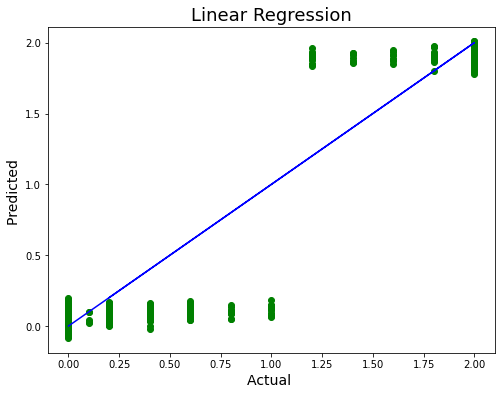

In [118]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='g')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual ', fontsize=14)
plt.ylabel('Predicted ', fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [120]:
def regressor(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

### Linear Regession

In [121]:
model=LinearRegression()
regressor(model, x1, y1)

Root Mean Square Error is: 0.17776314219514475
R2 Score is: 95.14044303516462
Cross Validation Score is: 95.08726567721646
R2 Score - Cross Validation Score is 0.05317735794815803


### L1 -- Lasso Regression

In [122]:
model=Lasso(alpha=0.0001)
regressor(model, x1, y1)

Root Mean Square Error is: 0.17773932452920174
R2 Score is: 95.14174516730556
Cross Validation Score is: 95.0871662185533
R2 Score - Cross Validation Score is 0.05457894875225122


### L2 -- Ridge Regression

In [123]:
model=Ridge(alpha=0.0001)
regressor(model, x1, y1)

Root Mean Square Error is: 0.17776313957615766
R2 Score is: 95.14044317835648
Cross Validation Score is: 95.08726557598737
R2 Score - Cross Validation Score is 0.05317760236910374


### Elastic Net

In [124]:
model=ElasticNet(alpha=0.0001)
regressor(model, x1, y1)

Root Mean Square Error is: 0.17774438665186887
R2 Score is: 95.14146843133629
Cross Validation Score is: 95.08692953501985
R2 Score - Cross Validation Score is 0.05453889631644415


### SVM

In [125]:
model=SVR(kernel='rbf')
regressor(model, x1, y1)# In[ ]:

Root Mean Square Error is: 0.529359647825365
R2 Score is: 56.906188660169185
Cross Validation Score is: 55.28780464842372
R2 Score - Cross Validation Score is 1.6183840117454622


In [128]:
model=SVR(kernel='poly')
regressor(model, x1, y1)

Root Mean Square Error is: 0.2992668281952418
R2 Score is: 86.22694118259136
Cross Validation Score is: 85.74888405345138
R2 Score - Cross Validation Score is 0.47805712913998377


In [129]:
model=SVR(kernel='linear')
regressor(model, x1, y1)

Root Mean Square Error is: 0.18071419025043722
R2 Score is: 94.97775664547366
Cross Validation Score is: 94.9980228947053
R2 Score - Cross Validation Score is -0.020266249231639222


### Decision Tree Regressor

In [130]:
model=DecisionTreeRegressor(random_state=111)
regressor(model, x1, y1)

Root Mean Square Error is: 0.25676364299992466
R2 Score is: 89.86134608919922
Cross Validation Score is: 87.09984708832707
R2 Score - Cross Validation Score is 2.761499000872149


### Random Forest Regressor

In [131]:
model=RandomForestRegressor()
regressor(model, x1, y1)

Root Mean Square Error is: 0.18370988206588731
R2 Score is: 94.8098695056459
Cross Validation Score is: 94.28899100311428
R2 Score - Cross Validation Score is 0.5208785025316303


### K Neighbors Regressor

In [132]:
model=KNeighborsRegressor()
regressor(model, x1, y1)

Root Mean Square Error is: 0.6849174399025266
R2 Score is: 27.857748857868735
Cross Validation Score is: 18.81288802210441
R2 Score - Cross Validation Score is 9.044860835764325


## Hyper parameter tuning

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=66)

### For lasso regression

In [134]:
parameters = {'alpha':[100, 300], 'selection': ['cyclic', 'random'], 'max_iter': [500, 1000], 'random_state': [100, 500]}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 100, 'max_iter': 500, 'random_state': 100, 'selection': 'cyclic'}


In [135]:
ls=Lasso(alpha=100,random_state=100,max_iter=500,selection='cyclic')
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

ls1 = r2_score(y_test,pred_ls)
ls1

-0.0001430701821525382

In [137]:
cv_score=cross_val_score(ls,x1,y1,cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.005828077398802733

### Dumping the model

In [138]:
# Save File
import pickle
file = 'rainfall_qty'
#save file
save = pickle.dump(clf,open(file,'wb'))